In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams.update({"font.size": 16})
default_cycle_colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
print(default_cycle_colors)

from cycler import cycler
import numpy as np

from scrinet.interfaces import lalutils

import lal
import lalsimulation as lalsim

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


In [2]:
# # ignore some scipy warnings with quad
# import warnings
# warnings.filterwarnings('ignore')

In [3]:
import rompy as rp

In [4]:
import utils

# load NR waveforms

In [5]:
import glob
import os

In [6]:
# get data
nrfiles_single_res = dict(
    q1="/Users/spx8sk/work/data/SXS_BBH_0180_Res4.h5",
    q2="/Users/spx8sk/work/data/SXS_BBH_0169_Res5.h5",
    q4="/Users/spx8sk/work/data/SXS_BBH_0167_Res5.h5",
    q5="/Users/spx8sk/work/data/SXS_BBH_0107_Res5.h5",
    q10="/Users/spx8sk/work/data/SXS_BBH_0303_Res5.h5",
    q18="/Users/spx8sk/work/git/stk/ml/waveforms/bob/q18a0a0c025_144-22-hybrid.h5",
)

In [7]:
def make_nr_dict():
    """
    makes a dictionary of paths to NR files
    with multiple resolutions
    """
    root_dir = "/Users/spx8sk/work/data/"
    nr_ids = dict(q1="180", q2="169", q4="167", q5="107", q10="303")

    nrfiles = {}

    for key, val in nr_ids.items():
        ps = glob.glob(os.path.join(root_dir, "*" + val + "*.h5"))

        nrfiles.update({key: {}})
        for p in ps:
            k = p.split("/")[-1].split(".h5")[0].split("_")[-1]
            nrfiles[key].update({k: p})

    return nrfiles

In [8]:
nrfiles = make_nr_dict()

In [9]:
nrfiles

{'q1': {'Res4': '/Users/spx8sk/work/data/SXS_BBH_0180_Res4.h5',
  'Res3': '/Users/spx8sk/work/data/SXS_BBH_0180_Res3.h5',
  'Res2': '/Users/spx8sk/work/data/SXS_BBH_0180_Res2.h5'},
 'q2': {'Res3': '/Users/spx8sk/work/data/SXS_BBH_0169_Res3.h5',
  'Res5': '/Users/spx8sk/work/data/SXS_BBH_0169_Res5.h5',
  'Res4': '/Users/spx8sk/work/data/SXS_BBH_0169_Res4.h5'},
 'q4': {'Res5': '/Users/spx8sk/work/data/SXS_BBH_0167_Res5.h5',
  'Res3': '/Users/spx8sk/work/data/SXS_BBH_0167_Res3.h5'},
 'q5': {'Res4': '/Users/spx8sk/work/data/SXS_BBH_0107_Res4.h5',
  'Res5': '/Users/spx8sk/work/data/SXS_BBH_0107_Res5.h5',
  'Res3': '/Users/spx8sk/work/data/SXS_BBH_0107_Res3.h5'},
 'q10': {'Res4': '/Users/spx8sk/work/data/SXS_BBH_0303_Res4.h5',
  'Res5': '/Users/spx8sk/work/data/SXS_BBH_0303_Res5.h5',
  'Res3': '/Users/spx8sk/work/data/SXS_BBH_0303_Res3.h5'}}

In [10]:
nrfiles_single_res

{'q1': '/Users/spx8sk/work/data/SXS_BBH_0180_Res4.h5',
 'q2': '/Users/spx8sk/work/data/SXS_BBH_0169_Res5.h5',
 'q4': '/Users/spx8sk/work/data/SXS_BBH_0167_Res5.h5',
 'q5': '/Users/spx8sk/work/data/SXS_BBH_0107_Res5.h5',
 'q10': '/Users/spx8sk/work/data/SXS_BBH_0303_Res5.h5',
 'q18': '/Users/spx8sk/work/git/stk/ml/waveforms/bob/q18a0a0c025_144-22-hybrid.h5'}

## example waveform generation

In [11]:
wg0 = utils.WaveformGeneration(nrfile=nrfiles_single_res["q18"])
wg1 = utils.WaveformGeneration(approximant=lalsim.SEOBNRv4, q=18)
wg2 = utils.WaveformGeneration(approximant=lalsim.IMRPhenomD, q=18)
wg3 = utils.WaveformGeneration(approximant=lalsim.IMRPhenomC, q=18)
wg4 = utils.WaveformGeneration(approximant=lalsim.IMRPhenomB, q=18)

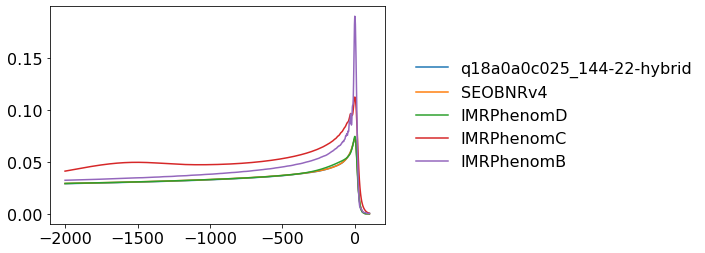

In [12]:
plt.figure()
for wg in [wg0, wg1, wg2, wg3, wg4]:
    plt.plot(wg.times, wg.amp, label=wg.label)
plt.legend(loc='center left', fancybox=True, framealpha=0., bbox_to_anchor=(1.05, 0.5))
# plt.xlim(-100,100)
# plt.yscale('log')

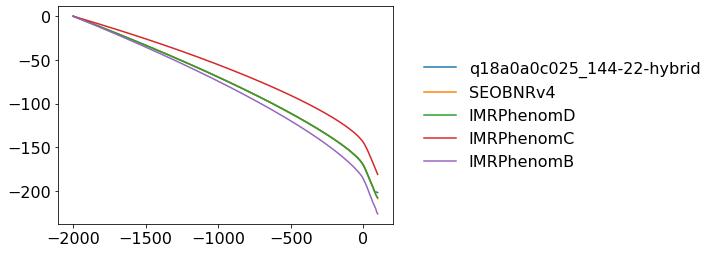

In [13]:
plt.figure()
for wg in [wg0, wg1, wg2, wg3, wg4]:
    plt.plot(wg.times, wg.phase, label=wg.label)
plt.legend(loc='center left', fancybox=True, framealpha=0., bbox_to_anchor=(1.05, 0.5))
# plt.xlim(-100,100)
# plt.yscale('log')

(-0.6, 0)

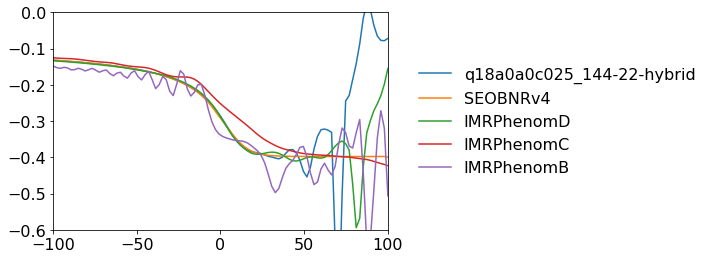

In [14]:
plt.figure()
for wg in [wg0, wg1, wg2, wg3, wg4]:
    plt.plot(wg.times, wg.freq, label=wg.label)
plt.legend(loc='center left', fancybox=True, framealpha=0., bbox_to_anchor=(1.05, 0.5))
plt.xlim(-100,100)
plt.ylim(-0.6, 0)
# plt.yscale('log')

# generate NR data

In [15]:
npts=1000

In [16]:
NR_wfs = [utils.WaveformGeneration(nrfile=nrfiles_single_res[key], npts=npts) for key in nrfiles_single_res]

In [17]:
nrfiles_single_res['q18']

'/Users/spx8sk/work/git/stk/ml/waveforms/bob/q18a0a0c025_144-22-hybrid.h5'

In [18]:
# NR_wfs=[]
# for key in nrfiles.keys():
#     for skey in nrfiles[key].keys():
#         NR_wfs.append(utils.WaveformGeneration(nrfile=nrfiles[key][skey], npts=npts))
        
# NR_wfs.append(utils.WaveformGeneration(nrfile=nrfiles_single_res['q18'], npts=npts))

In [19]:
len(NR_wfs)

6

In [20]:
[NR.q for NR in NR_wfs]

[1.0, 2.0, 4.0, 5.0, 10.0, 18.0]

# generate model A waveforms to build a basis

In [21]:
q_min = 1
# max NR mass-ratio we have right now is 18
q_max = 18
q_npts = 100

# dq=0.1
# q_random = np.random.uniform(q_min+dq, q_max-dq, q_npts)
# q_same_as_nr = np.array([1,2,4,5,10,18])
# q_arr = np.concatenate((q_same_as_nr, q_random))

q_arr = np.linspace(q_min, q_max, q_npts)

In [22]:
modelA_approx = "IMRPhenomC"
# modelA_approx = "SEOBNRv4_opt"
modelA_wfs = [utils.WaveformGeneration(approximant=lalsim.GetApproximantFromString(modelA_approx), q=q, npts=npts) for q in q_arr]

In [23]:
# generate modelB waveforms
modelB_approx = "IMRPhenomD"
modelB_wfs = [utils.WaveformGeneration(approximant=lalsim.GetApproximantFromString(modelB_approx), q=q, npts=npts) for q in q_arr]

In [280]:
# plt.figure()
# for wg in modelA_wfs:
#     plt.plot(wg.times, wg.amp, label=wg.q)
# # plt.legend(loc='center left', fancybox=True, framealpha=0., bbox_to_anchor=(1.05, 0.5))
# # plt.xlim(-100,100)
# # plt.yscale('log')
# plt.title('model A training set (amplitude)')

In [21]:
# plt.figure()
# for wg in modelA_wfs:
#     plt.plot(wg.times, wg.phase, label=wg.q)
# # plt.legend(loc='center left', fancybox=True, framealpha=0., bbox_to_anchor=(1.05, 0.5))
# # plt.xlim(-100,100)
# plt.title('model A training set (phase)')

In [321]:
# plt.figure()
# for wg in modelA_wfs:
#     plt.plot(wg.times, wg.freq, label=wg.q)
# # plt.legend(loc='center left', fancybox=True, framealpha=0., bbox_to_anchor=(1.05, 0.5))
# # plt.xlim(-100,100)
# plt.title('model A training set (frequency)')

## build basis of modelA

In [24]:
def build_basis(times, ts, greedy_tol, verbose=True, max_num_basis=None, rel=True):
    
    if max_num_basis is None:
        max_num_basis = ts.shape[0]
    
    integration = rp.Integration(
        [times[0], times[-1]], len(times), rule="trapezoidal")
    x = integration.nodes
    rb = rp.ReducedBasis(integration)
    rb.make(ts, 0, greedy_tol, verbose=verbose, num=max_num_basis, rel=rel)
    
#     greedy_errors = rb.errors
#     nbasis = rb.size
#     greedy_points = ts_coords[rb.indices]
#     basis = rb.basis

    return rb

In [25]:
# if using modelB waveforms
USE_HYBRID_TS=True

x = modelA_wfs[0].times
modelA_ts = np.array([wg.amp for wg in modelA_wfs])

# modelB specific
modelB_ts = np.array([wg.amp for wg in modelB_wfs])

# hybrid training set
if USE_HYBRID_TS:
    ts = np.row_stack((modelA_ts, modelB_ts))
    domain = np.concatenate((q_arr, q_arr))
else:
    ts = modelA_ts.copy()
    domain = q_arr.copy()

In [26]:
# if using NR waveforms
# USE_HYBRID_TS=True

# x = modelA_wfs[0].times
# modelA_ts = np.array([wg.amp for wg in modelA_wfs])

# # nr specific
# nr_ts = np.array([wg.amp for wg in NR_wfs])
# nr_q_arr = np.array([wg.q for wg in NR_wfs])

# # hybrid training set
# if USE_HYBRID_TS:
#     ts = np.row_stack((modelA_ts, nr_ts))
#     domain = np.concatenate((q_arr, nr_q_arr))
# else:
#     ts = modelA_ts.copy()
#     domain = q_arr.copy()

In [27]:
# NR waveforms with multiple resolutions
nr_ts = np.array([wg.amp for wg in NR_wfs])
nr_q_arr = np.array([wg.q for wg in NR_wfs])

In [28]:
greedy_tol=1e-6

In [29]:
modelA_amp_rb = build_basis(x, ts, greedy_tol)

('\nStep', '\t', 'Error')
(1, '\t', 1.0)
(2, '\t', 0.0011986019215921523)
(3, '\t', 0.000642840939441349)
(4, '\t', 0.0002416232779408106)
(5, '\t', 0.00014764290961926567)
(6, '\t', 7.013452309059354e-05)
(7, '\t', 5.722728850997829e-06)
(8, '\t', 3.067550499825963e-06)
(9, '\t', 2.1160088957721505e-06)
(10, '\t', 1.2334029280664948e-06)
(11, '\t', 6.270918334687487e-07)


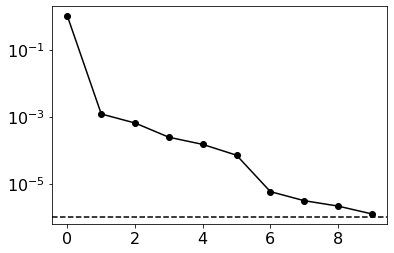

In [30]:
plt.figure()
plt.plot(modelA_amp_rb.errors/modelA_amp_rb.errors[0], 'k-o')
plt.yscale('log')
plt.axhline(greedy_tol, color='k', ls='--')

In [31]:
domain[modelA_amp_rb.indices]

array([ 1.        , 18.        ,  1.        ,  4.60606061,  8.21212121,
        2.37373737,  1.68686869,  3.23232323,  2.71717172,  9.75757576])

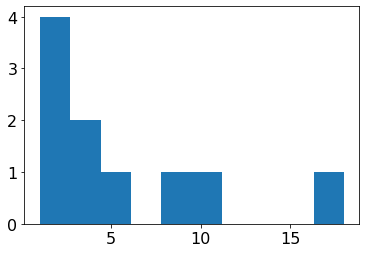

In [32]:
plt.figure()
plt.hist(domain[modelA_amp_rb.indices]);

### compute EIM

In [33]:
def make_data(ts, eim_indicies):
    return np.transpose(ts)[eim_indicies]

In [34]:
modelA_amp_eim = rp.EmpiricalInterpolant(modelA_amp_rb.basis, verbose=True)
# eim_basis = modelA_amp_eim.B
# eim_indices = modelA_amp_eim.indices

('\nStep', '\t', 'Nodes')
(1, '\t', 951)
(2, '\t', 963)
(3, '\t', 941)
(4, '\t', 947)
(5, '\t', 0)
(6, '\t', 666)
(7, '\t', 435)
(8, '\t', 250)
(9, '\t', 931)
(10, '\t', 973)


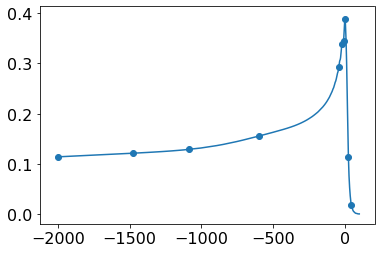

In [35]:
plt.figure()
plt.plot(x, ts[0])
plt.scatter(x[modelA_amp_eim.indices], ts[0][modelA_amp_eim.indices])
# plt.xlim(-100, 100)

In [36]:
modelA_amp_eim_alpha = make_data(modelA_ts, modelA_amp_eim.indices)

In [37]:
NR_amp_eim_alpha = make_data(nr_ts, modelA_amp_eim.indices)

In [38]:
modelB_amp_eim_alpha = make_data(modelB_ts, modelA_amp_eim.indices)

(-100, 100)

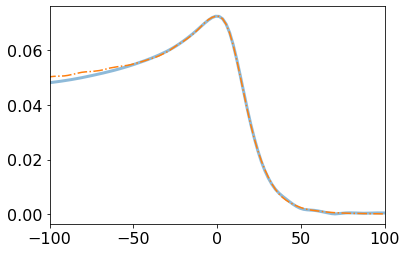

In [39]:
index = -1

plt.figure()

#modelA data
# plt.plot(x, modelA_ts[index])
#modelA representation
# plt.plot(x, np.dot(modelA_amp_eim_alpha[:,index], modelA_amp_eim.B), ls='--')

#NR data
plt.plot(x, nr_ts[index], alpha=0.5, lw=3)
#NR projected onto modelA(possibly /NR hybrid) basis
plt.plot(x, np.dot(NR_amp_eim_alpha[:,index], modelA_amp_eim.B), ls='-.')

# #modelB data
# plt.plot(x, modelB_ts[index], alpha=0.5, lw=3)
# #modelB projected onto modelA(possibly /modelB) basis
# plt.plot(x, np.dot(modelB_amp_eim_alpha[:,index], modelA_amp_eim.B), ls='-.')

# plt.yscale('log')
plt.xlim(-100,100)

In [40]:
modelA_amp_eim_alpha.shape

(10, 100)

In [41]:
# NR_amp_eim_alpha.shape
modelB_amp_eim_alpha.shape

(10, 100)

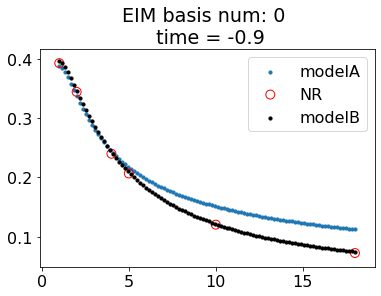

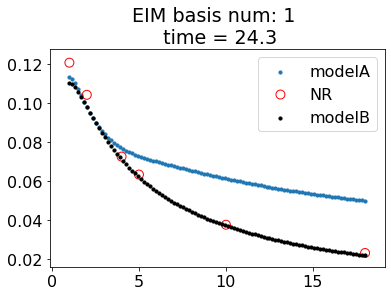

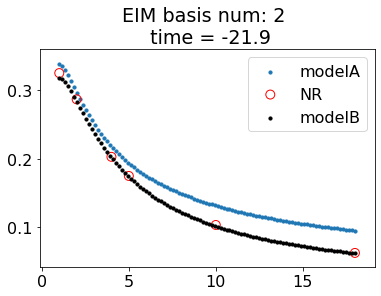

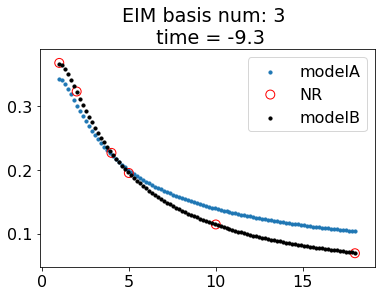

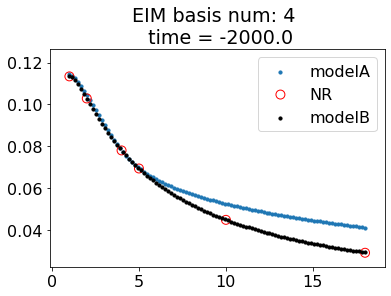

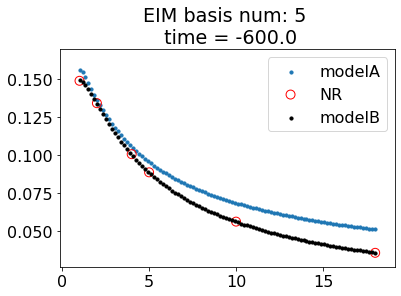

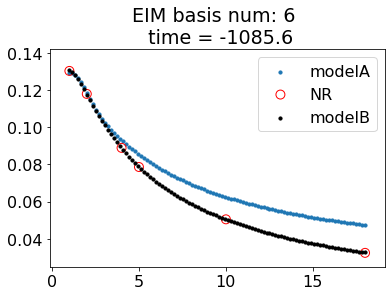

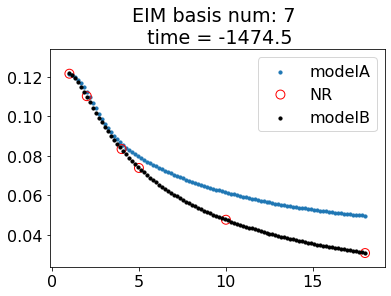

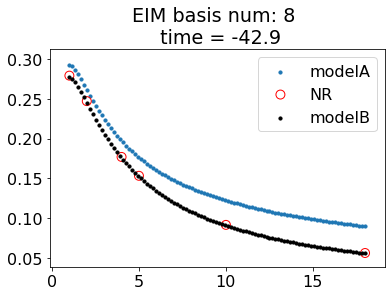

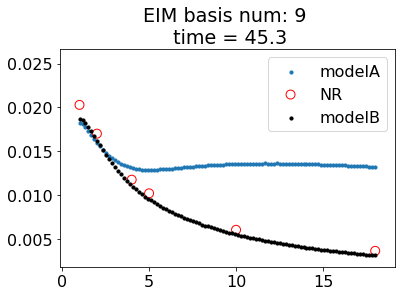

In [42]:
for i in range(modelA_amp_rb.size):
    plt.figure()
    plt.scatter(q_arr, modelA_amp_eim_alpha[i], label='modelA', s=10)
    plt.scatter(nr_q_arr, NR_amp_eim_alpha[i], label='NR', s=80, facecolors='none', edgecolors='r')
    plt.scatter(q_arr, modelB_amp_eim_alpha[i], label='modelB', c='k', s=10)

    
    t_eim = x[modelA_amp_eim.indices[i]]
    plt.title(f"EIM basis num: {i} \n time = {t_eim:.1f}")
    plt.legend()
    plt.show()
    plt.close()

In [43]:
from scipy.interpolate import InterpolatedUnivariateSpline as IUS

In [44]:
imodelA_alpha = []
imodelB_alpha = []
imodelNR_alpha = []
for i in range(modelA_amp_rb.size):
    imodelA_alpha.append(IUS(q_arr, modelA_amp_eim_alpha[i]))
    imodelB_alpha.append(IUS(q_arr, modelB_amp_eim_alpha[i]))
    imodelNR_alpha.append(IUS(nr_q_arr, NR_amp_eim_alpha[i]))

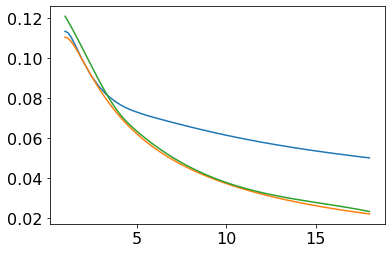

In [45]:
new_q = np.linspace(1, 18, 100)
plt.figure()
plt.plot(new_q, imodelA_alpha[1](new_q))
plt.plot(new_q, imodelB_alpha[1](new_q))
plt.plot(new_q, imodelNR_alpha[1](new_q))

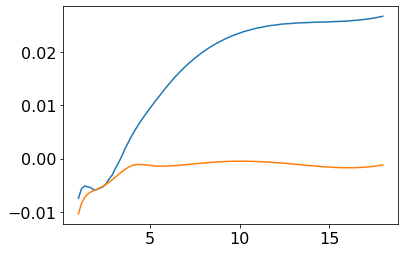

In [46]:
new_q = np.linspace(1, 18, 100)
plt.figure()
plt.plot(new_q, imodelA_alpha[1](new_q) - imodelNR_alpha[1](new_q))
plt.plot(new_q, imodelB_alpha[1](new_q) - imodelNR_alpha[1](new_q))


In [47]:
def generate_waveforms_with_band(mass_ratio, modelA_alpha_funcs, modelB_alpha_funcs, basis, size=5, vary_indicies=None):
    
    # generate interpolated(true) model A coefficients
    # i.e., the mean
    modelA_alphas = np.array([f(mass_ratio) for f in modelA_alpha_funcs])
    
    # generate interpolated model B coefficients
    # i.e. the error measure
    modelB_alphas = np.array([f(mass_ratio) for f in modelB_alpha_funcs])
    
#     sigmas = np.abs(modelA_alphas - modelB_alphas)
    
    draws = []
    for i, (low, high) in enumerate(zip(modelA_alphas, modelB_alphas)):
        if vary_indicies:
            if i in vary_indicies:
                draw = np.random.uniform(low, high, size=size)
#                 mu = low
#                 sig = np.abs(low-high)
#                 draw = np.random.normal(mu, sig, size=size)
            else:
                draw = np.array([low] * size)
        else:
            draw = np.array([low] * size)
        draws.append(draw)
        
    draws = np.array(draws)
        
#     print(draws[1])
    
    wfs = []
    
    for i in range(draws.shape[1]):
        alpha = draws[:,i]
        wfs.append(np.dot(alpha, basis))
            
#     return draws
    return wfs

In [48]:
len(imodelA_alpha)

10

In [49]:
wfs = generate_waveforms_with_band(18, imodelA_alpha, imodelNR_alpha, modelA_amp_eim.B, size=100, vary_indicies=list(range(10)))
# wfs = generate_waveforms_with_band(18, imodelA_alpha, imodelNR_alpha, modelA_amp_eim.B, size=100, vary_indicies=None)

(-100, 100)

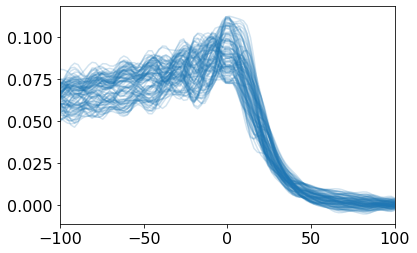

In [50]:
plt.figure()
for wf in wfs:
    plt.plot(x, wf, c='C0', alpha=0.2)
plt.xlim(-100,100)
# plt.yscale('log')

In [51]:
nr_q_arr

array([ 1.,  2.,  4.,  5., 10., 18.])

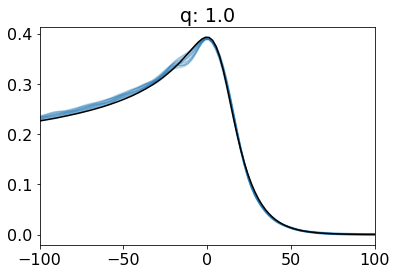

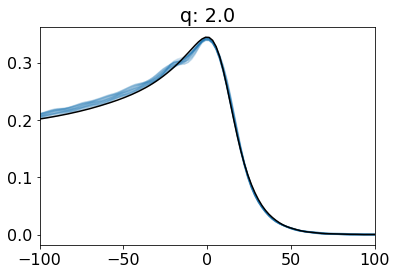

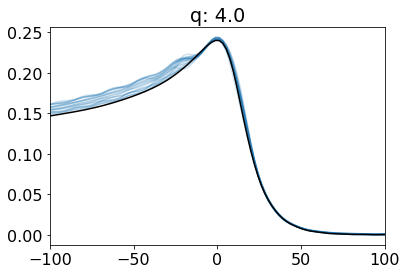

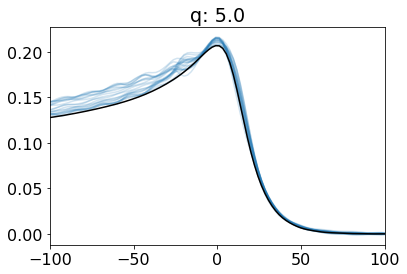

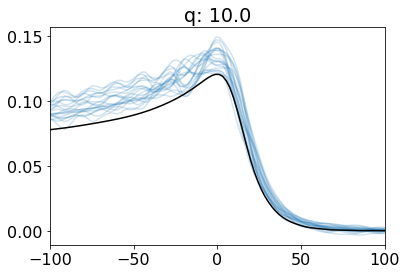

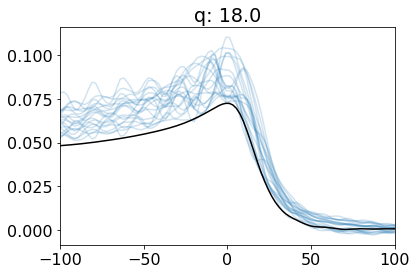

In [52]:

# vary_indicies=[0]
vary_indicies = list(range(len(imodelA_alpha)))
# vary_indicies = None
for i, nr_q in enumerate(nr_q_arr):
    wfs = generate_waveforms_with_band(nr_q, imodelA_alpha, imodelNR_alpha, modelA_amp_eim.B, size=20, vary_indicies=vary_indicies)
    
    plt.figure()
    for wf in wfs:
        plt.plot(x, wf, c='C0', alpha=0.2)
    plt.plot(x, nr_ts[i], c='k')
    plt.xlim(-100,100)
#     plt.yscale('log')
    plt.title(f"q: {nr_q}")

# fitting data - only considering the case where we have the error bar at every point. will generalise to "NR" case later

## using gpflow

In [53]:
# https://gpflow.readthedocs.io/en/develop/notebooks/basics/regression.html

In [54]:
import tensorflow as tf
import gpflow
from gpflow.ci_utils import ci_niter
from gpflow.optimizers import NaturalGradient
from gpflow import set_trainable
from gpflow.utilities import print_summary

In [55]:
# variable noise
# https://gpflow.readthedocs.io/en/develop/notebooks/advanced/varying_noise.html

## prep-data

In [78]:
y_index = 0

X = q_arr.reshape(-1, 1).copy()
Y = modelA_amp_eim_alpha.T.copy()

Y = Y[:,y_index].reshape(-1,1)


Y_B = modelB_amp_eim_alpha.T.copy()
Y_B = Y_B[:,y_index].reshape(-1,1)

In [79]:
print(X.shape)
print(Y.shape)
print(Y_B.shape)

(100, 1)
(100, 1)
(100, 1)


In [80]:
# generate some fake error bars guided by difference from modelB projection

In [81]:
diff = np.abs(Y - Y_B)


NoiseVar = (diff/2)**2

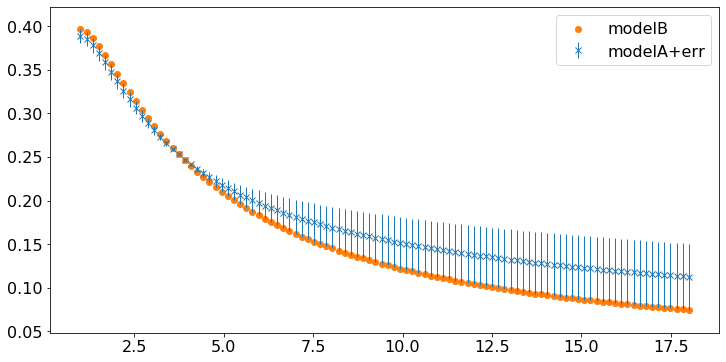

In [82]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.scatter(X.squeeze(), Y_B.squeeze(), c='C1', label='modelB')
ax.errorbar(
    X.squeeze(),
    Y.squeeze(),
    yerr=2 * (np.sqrt(NoiseVar)).squeeze(),
    marker="x",
    lw=0,
    elinewidth=1.0,
    label='modelA+err'
)
plt.legend()

In [83]:
Y_data = np.hstack([Y, NoiseVar])

In [84]:
class HeteroskedasticGaussian(gpflow.likelihoods.Likelihood):
    def __init__(self, **kwargs):
        # this likelihood expects a single latent function F, and two columns in the data matrix Y:
        super().__init__(latent_dim=1, observation_dim=2, **kwargs)

    def _log_prob(self, F, Y):
        # log_prob is used by the quadrature fallback of variational_expectations and predict_log_density.
        # Because variational_expectations is implemented analytically below, this is not actually needed,
        # but is included for pedagogical purposes.
        # Note that currently relying on the quadrature would fail due to https://github.com/GPflow/GPflow/issues/966
        Y, NoiseVar = Y[:, 0], Y[:, 1]
        return gpflow.logdensities.gaussian(Y, F, NoiseVar)

    def _variational_expectations(self, Fmu, Fvar, Y):
        Y, NoiseVar = Y[:, 0], Y[:, 1]
        Fmu, Fvar = Fmu[:, 0], Fvar[:, 0]
        return (
            -0.5 * np.log(2 * np.pi)
            - 0.5 * tf.math.log(NoiseVar)
            - 0.5 * (tf.math.square(Y - Fmu) + Fvar) / NoiseVar
        )

    # The following two methods are abstract in the base class.
    # They need to be implemented even if not used.

    def _predict_log_density(self, Fmu, Fvar, Y):
        raise NotImplementedError

    def _predict_mean_and_var(self, Fmu, Fvar):
        raise NotImplementedError

In [85]:
# model construction
likelihood = HeteroskedasticGaussian()
kernel = gpflow.kernels.Matern52(lengthscales=0.5)
model = gpflow.models.VGP((X, Y_data), kernel=kernel, likelihood=likelihood, num_latent_gps=1)

In [86]:
natgrad = NaturalGradient(gamma=1.0)
adam = tf.optimizers.Adam()

set_trainable(model.q_mu, False)
set_trainable(model.q_sqrt, False)

for _ in range(ci_niter(1000)):
    natgrad.minimize(model.training_loss, [(model.q_mu, model.q_sqrt)])
    adam.minimize(model.training_loss, model.trainable_variables)

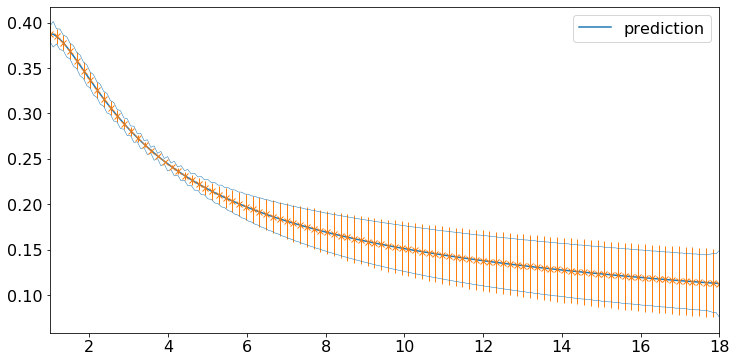

In [91]:
# let's do some plotting!
xx = np.linspace(1, 18, 200)[:, None]

mu, var = model.predict_f(xx)

plt.figure(figsize=(12, 6))
plt.plot(xx, mu, "C0", label='prediction')
plt.plot(xx, mu + 2 * np.sqrt(var), "C0", lw=0.5)
plt.plot(xx, mu - 2 * np.sqrt(var), "C0", lw=0.5)

plt.errorbar(
    X.squeeze(),
    Y.squeeze(),
    yerr=2 * (np.sqrt(NoiseVar)).squeeze(),
    marker="x",
    lw=0,
    elinewidth=1.0,
    color="C1",
)
_ = plt.xlim(1, 18)
plt.legend()

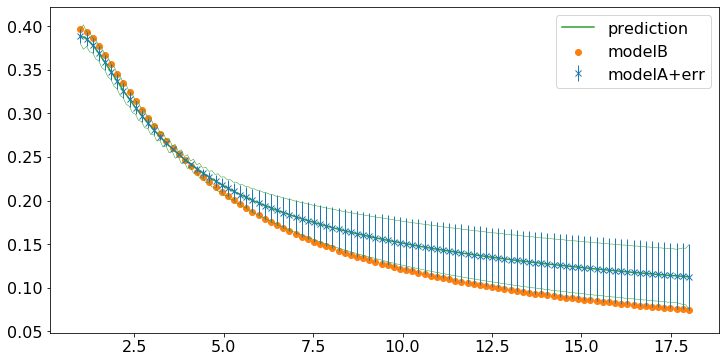

In [92]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.scatter(X.squeeze(), Y_B.squeeze(), c='C1', label='modelB')
ax.errorbar(
    X.squeeze(),
    Y.squeeze(),
    yerr=2 * (np.sqrt(NoiseVar)).squeeze(),
    marker="x",
    lw=0,
    elinewidth=1.0,
    label='modelA+err'
)


xx = np.linspace(1, 18, 200)[:, None]

mu, var = model.predict_f(xx)

plt.plot(xx, mu, "C2", label='prediction')
plt.plot(xx, mu + 2 * np.sqrt(var), "C2", lw=0.5)
plt.plot(xx, mu - 2 * np.sqrt(var), "C2", lw=0.5)

plt.legend()

In [71]:


def generate_data(N=20):
    X = np.random.rand(N)[:, None] * 10 - 5  # Inputs, shape N x 1
    X = np.linspace(-5,5,N).reshape(-1,1)
#     F = 2.5 * np.sin(1 * X) #+ np.cos(3 * X)  # Mean function values
    F = X
#     NoiseVar = 2 * np.exp(-((X - 2) ** 2) / 4) + 0.3  # Noise variances
    NoiseVar = 0.01*np.ones_like(X)
    Y = F + np.random.randn(N, 1) * np.sqrt(NoiseVar)  # Noisy data
    return X, Y, NoiseVar


X, Y, NoiseVar = generate_data()

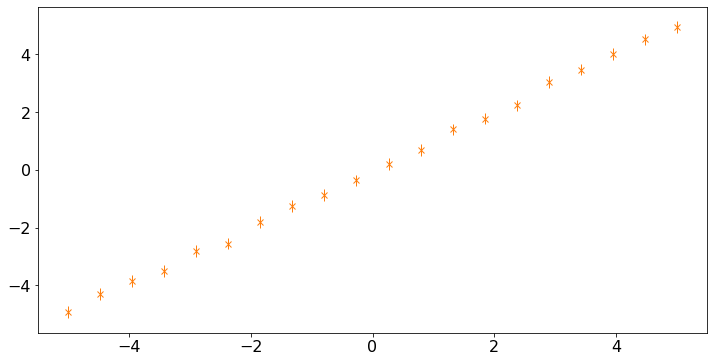

In [72]:

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
_ = ax.errorbar(
    X.squeeze(),
    Y.squeeze(),
    yerr=2 * (np.sqrt(NoiseVar)).squeeze(),
    marker="x",
    lw=0,
    elinewidth=1.0,
    color="C1",
)

In [73]:
Y_data = np.hstack([Y, NoiseVar])

In [74]:
likelihood = HeteroskedasticGaussian()
# kernel = gpflow.kernels.Matern52(lengthscales=0.5)
kernel = gpflow.kernels.Linear()
model = gpflow.models.VGP((X, Y_data), kernel=kernel, likelihood=likelihood, num_latent_gps=1)

In [75]:
adam = tf.optimizers.Adam()

set_trainable(model.q_mu, False)
set_trainable(model.q_sqrt, False)

for _ in range(ci_niter(1000)):
    natgrad.minimize(model.training_loss, [(model.q_mu, model.q_sqrt)])
    adam.minimize(model.training_loss, model.trainable_variables)

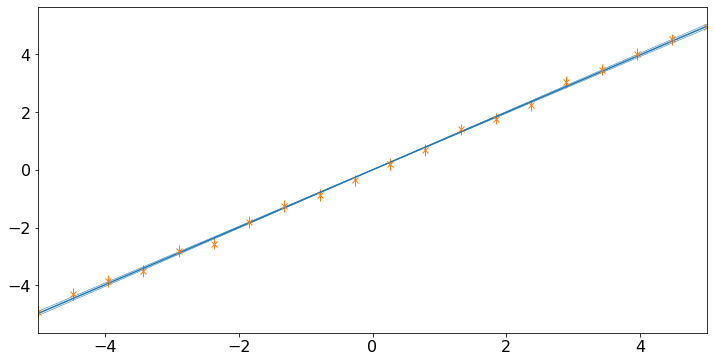

In [76]:
xx = np.linspace(-5, 5, 200)[:, None]

mu, var = model.predict_f(xx)

plt.figure(figsize=(12, 6))
plt.plot(xx, mu, "C0")
plt.plot(xx, mu + 2 * np.sqrt(var), "C0", lw=0.5)
plt.plot(xx, mu - 2 * np.sqrt(var), "C0", lw=0.5)

plt.errorbar(
    X.squeeze(),
    Y.squeeze(),
    yerr=2 * (np.sqrt(NoiseVar)).squeeze(),
    marker="x",
    lw=0,
    elinewidth=1.0,
    color="C1",
)
_ = plt.xlim(-5, 5)